# Introduction

When thinking of what makes a neighborhood the best, safety seems like the obvious choice.  It is hard to worry about schools, transit, or anything else if you do not feel safe.  We decided to think of safety by crimes, fires, and air quality.  Crimes in general are scary to people, and very few people feel safe in areas with a lot of crime.  Violent crimes especially make people feel unsafe.  Fires can be very deFires can cost people their lives, the lives of loved ones, and all of their material possessions, including their shelter.  A neighborhood that is not prone to fires is not safe for the people there.  Most people do not associate air quality with safety, but poor air quality can kill us.

# Crimes

I used the Pittsburgh Police Arrests dataset to see how safe the neighborhoods in Pittsburgh are.  The datset can be accessed here: [Arrest Data](https://data.wprdc.org/dataset/arrest-data)

This Dataset lists all the arrests by Pittsburgh Police.  With each arrest it has some information, I used the Neighborhood of the Incident that caused the arrest, and what the arrest was for.  Using these, I was able to find out how many crimes and violent crimes occured in each neighborhood.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

crime = pd.read_csv("arrestdata.csv")



Central Business District    4238
South Side Flats             3377
Carrick                      2297
East Allegheny               2153
Homewood South               2044
                             ... 
Regent Square                  36
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


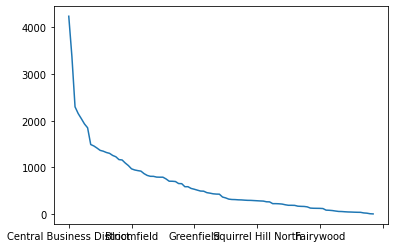

In [3]:
print(crime['INCIDENTNEIGHBORHOOD'].value_counts())
crime['INCIDENTNEIGHBORHOOD'].value_counts().plot()


Based on these initial findings, Mt. Oliver Neighborhood appears to be the safest, with the Central Business District being the most dangerous.  Unfortunately, the arrest dataset did not contain any population data for the neighborhoods, so this is only the amount of crimes in a neighborhood, not the amount of crimes per an amount of people.

I also wanted to find out how these neighborhoods were specifically with violent crime.

Central Business District    842
South Side Flats             813
Carrick                      763
Marshall-Shadeland           572
Homewood North               527
                            ... 
Outside State                  6
Mt. Oliver Boro                5
Mt. Oliver Neighborhood        1
Central Northside              1
Outside County                 1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64


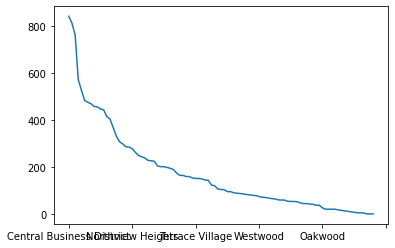

In [4]:
query_mask = crime['OFFENSES'].str.contains('Assault', na = False)
assault = crime[query_mask]
print(assault['INCIDENTNEIGHBORHOOD'].value_counts())
assault['INCIDENTNEIGHBORHOOD'].value_counts().plot()

Mt Oliver also has the lowest amount of assaults, and the Mt Oliver Borough has the second least.

Knoxville                      14
Carrick                        12
Sheraden                       12
Homewood South                 11
Homewood North                 11
                               ..
Upper Hill                      1
Terrace Village                 1
Troy Hill                       1
Golden Triangle/Civic Arena     1
Upper Lawrenceville             1
Name: INCIDENTNEIGHBORHOOD, Length: 61, dtype: int64


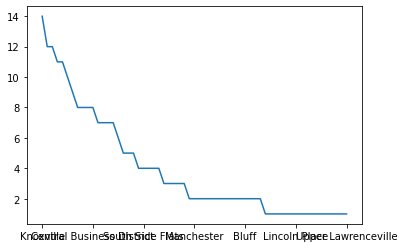

In [6]:
query_mask = crime['OFFENSES'].str.contains('Homicide', na = False)
homicide = crime[query_mask]
print(homicide['INCIDENTNEIGHBORHOOD'].value_counts())
homicide['INCIDENTNEIGHBORHOOD'].value_counts().plot()

This graph has less elements than the previous one because it does not show neighborhoods with 0 homicides.  Mt Oliver does not have any murders, and is still appearing to be the safest neighborhood in terms of crime.

Central Business District    850
South Side Flats             817
Carrick                      775
Marshall-Shadeland           580
Homewood North               538
                            ... 
Outside State                  6
Mt. Oliver Boro                5
Mt. Oliver Neighborhood        1
Central Northside              1
Outside County                 1
Name: INCIDENTNEIGHBORHOOD, Length: 97, dtype: int64


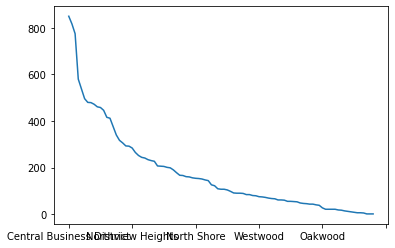

In [7]:
violentcrimes = pd.concat([assault, homicide])
print(violentcrimes['INCIDENTNEIGHBORHOOD'].value_counts())
violentcrimes['INCIDENTNEIGHBORHOOD'].value_counts().plot()

If I assign normal crimes a value of 1 and violent crimes a value of 2, multiply the amount of those crimes and add them, I get my crime score.  Arrests for Rape did not factor into this because the neighborhood is not listed for rapes.  Mt Oliver has the lowest with a score of 4, Troy Hill-Herrs Island is in second with a score of 6, Central Northside is third with a score of 25, and Mt Oliver Borough is fourth with a score of 28.

# Fire Incidents

Carrick                      283
Central Business District    266
South Side Flats             260
Squirrel Hill South          252
Hazelwood                    244
                            ... 
St. Clair                     12
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  9
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64


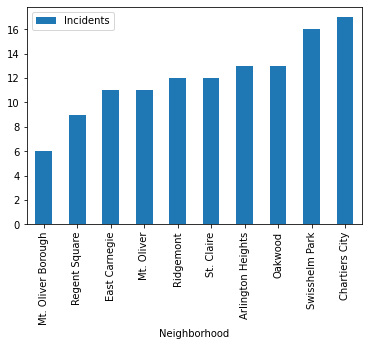

In [4]:
fire = pd.read_csv("fire_incidents.csv")

newdict = dict()
for index, row in fire.iterrows():
    if fire.neighborhood[index] in newdict:
        number = newdict[fire.neighborhood[index]]
        newdict[fire.neighborhood[index]] = number + 1
    else:
        newdict[fire.neighborhood[index]]=1

        
print(fire['neighborhood'].value_counts())
df = pd.DataFrame({'Neighborhood':['Mt. Oliver Borough', 'Regent Square', 'East Carnegie', 'Mt. Oliver', 'Ridgemont', 'St. Claire', 'Arlington Heights', 'Oakwood', 'Swisshelm Park', 'Chartiers City'], 'Incidents':[6, 9, 11, 11, 12, 12, 13, 13, 16, 17]})
ax = df.plot.bar(x='Neighborhood', y='Incidents', rot=90)

After reviewing the data for the number of fire incidents, it appears that Carrick is the most dangerous neighborhood in Pittsburgh with 283 fire incidents reported from 2013 to 2023.
Mount Oliver Borough is the safest neighborhood, as it only has had 6 incidents reported over the last 10 years. The graph demonstrates the ten safest cities by this standard. However, if we want to exclude certain types of fires, such as contained cooking fires, this would change the data a bit.

Carrick                      231
Central Business District    206
Hazelwood                    197
South Side Flats             191
Mount Washington             186
                            ... 
East Carnegie                  7
Regent Square                  7
Mount Oliver Borough           6
Arlington Heights              6
Glen Hazel                     5
Name: neighborhood, Length: 91, dtype: int64


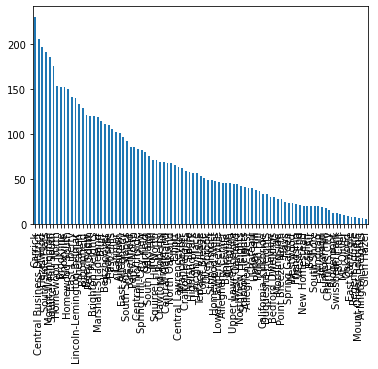

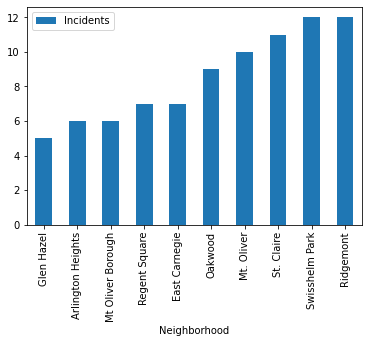

In [5]:
fire_type = fire[fire["type_description"].str.contains('Cooking fire, confined to container')==False]
print(fire_type['neighborhood'].value_counts())
fire_type['neighborhood'].value_counts().plot.bar()
df = pd.DataFrame({'Neighborhood':['Glen Hazel', 'Arlington Heights', 'Mt Oliver Borough', 'Regent Square', 'East Carnegie', 'Oakwood', 'Mt. Oliver', 'St. Claire', 'Swisshelm Park', 'Ridgemont'], 'Incidents':[5, 6, 6, 7, 7, 9, 10, 11, 12, 12]})
ax = df.plot.bar(x='Neighborhood', y='Incidents', rot=90)

Glen Hazel would become the safest city by fire standards, though Mt. Oliver Borough would only be moved down to the third safest.

# Air Quality

In [2]:
aqi = pd.read_csv("AQI.csv")
aqi.head(100)

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,4,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,5,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
...,...,...,...,...,...,...,...,...
95,96,2016-01-05,Lawrenceville 2,SO2,27,Good,NaN,NaN
96,97,2016-01-05,South Fayette,SO2,11,Good,NaN,NaN
97,98,2016-01-05,Parkway East,CO,7,Good,NaN,NaN
98,99,2016-01-05,Glassport High Street,PM10,9,Good,NaN,NaN


In [3]:
dictnum = dict()
changed = False
for i in aqi.index:
    
    for x in dictnum:
        if x == aqi['site'][i]:
            dictnum.update({aqi['site'][i] : dictnum[x] + 1})
            changed = True
            break
    
    if changed == False:
        dictnum.update({aqi['site'][i] : 1})
    changed = False
    
for x, y in dictnum.items():
    print(x, y)

Lawrenceville 4398
Flag Plaza 4002
Harrison Township 5550
Avalon 4424
Lincoln 3574
South Fayette 4999
North Braddock 7237
Parkway East 8572
Liberty 2 5636
Lawrenceville 2 5714
Glassport High Street 2857
Liberty 2878
Clairton 925
West Mifflin 301
Pittsburgh 2605


In [4]:
dictAvg = dict()
added = False
for i in aqi.index:
    for x in dictAvg:
        if x == aqi['site'][i]:
            dictAvg.update({aqi['site'][i] : dictAvg[x] + aqi['index_value'][i]})
            added = True
            break
    
    if added == False:
        dictAvg.update({aqi['site'][i] : aqi['index_value'][i]})
    added = False

for x in dictAvg:
    dictAvg.update({x : dictAvg[x]/dictnum[x]})

for x, y in dictAvg.items():
    print(x, y)

Lawrenceville 37.7019099590723
Flag Plaza 9.94927536231884
Harrison Township 24.28900900900901
Avalon 23.486663652802893
Lincoln 35.10800223838836
South Fayette 22.701740348069613
North Braddock 18.779604808622356
Parkway East 21.904806346243582
Liberty 2 32.46132008516678
Lawrenceville 2 3.0582779138956946
Glassport High Street 17.453622681134057
Liberty 18.506254343293953
Clairton 25.835675675675677
West Mifflin 6.335548172757475
Pittsburgh 26.131669865642994


These are the averages of all of the 65,000 sets of data taken by different sesors in different neighborhoods we can see that West Mifflin and Flag Plaza have the lowest average AQI out of all of the different neighborhoods

In [5]:
lawrenceAvg = (37.7019099590723 + 3.0582779138956946)/2
libertyAvg = (32.46132008516678 + 18.506254343293953)/2
print("Lawrenceville", lawrenceAvg)
print("Liberty", libertyAvg)

Lawrenceville 20.380093936484
Liberty 25.483787214230368


These are the offical averages of Lawrenceville and Liberty sice they both had 2 different sesors on them.

1. West Mifflin 6.335548172757475
2. Flag Plaza 9.94927536231884
3. Glassport High Street 17.453622681134057
4. North Braddock 18.779604808622356
5. Lawrenceville 20.380093936484
6. Parkway East 21.904806346243582
7. South Fayette 22.701740348069613
8. Avalon 23.486663652802893
9. Harrison Township 24.28900900900901
10. Liberty 25.483787214230368
11. Clairton 25.835675675675677
12. Pittsburgh 26.131669865642994
13. Lincoln 35.10800223838836

Neighborhoods ranked from most healthy to least healthy average AQI

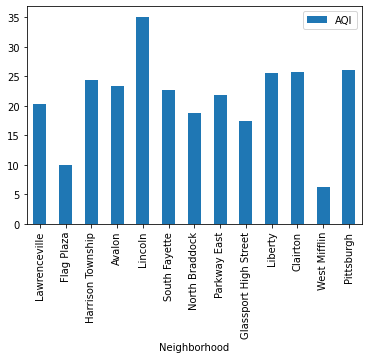

In [2]:
df = pd.DataFrame({'Neighborhood':['Lawrenceville', 'Flag Plaza', 'Harrison Township', 'Avalon', 'Lincoln', 'South Fayette', 'North Braddock', 'Parkway East', 'Glassport High Street', 'Liberty', 'Clairton', 'West Mifflin', 'Pittsburgh'], 'AQI':[20.3, 9.9, 24.3, 23.4, 35.1, 22.7, 18.8, 21.9, 17.5, 25.5, 25.8, 6.3, 26.1]})
ax = df.plot.bar(x='Neighborhood', y='AQI', rot=90)

# Conclusion

Patrick: After analyzing each submetric, I think that Mount Oliver is the safest and therefore best neighborhood in Pittsburgh. It has the lowest crime score, and the seventh lowest amount of fire incidents. Unfortunately, the air quality dataset did not split into the same neighborhoods as our other datasets, so I cannot factor that into our consideration of safest neighborhood. Overall, Mount Oliver does not struggle with crime or fire safety, so we consider it the best neighborhood in Pittsburgh.